In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
np.__version__

'1.26.4'

<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:16: SyntaxWarning: invalid escape sequence '\d'
  df['term_months'] = df['term'].str.strip().str.extract('(\d+)').astype(float)


--- Target Variable Definitions Complete ---
Defaulted loans count: 51425
Non-defaulted loans count: 414860
LGD (first 5 defaulted loans):
1     0.953168
8     0.966239
9     0.949900
12    0.950633
14    0.935490
Name: LGD, dtype: float64
EAD (first 5 defaulted loans):
1     2043.54
8     5437.98
9     4701.52
12    7743.86
14    4566.53
Name: EAD, dtype: float64


C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_default', data=df, palette='viridis')


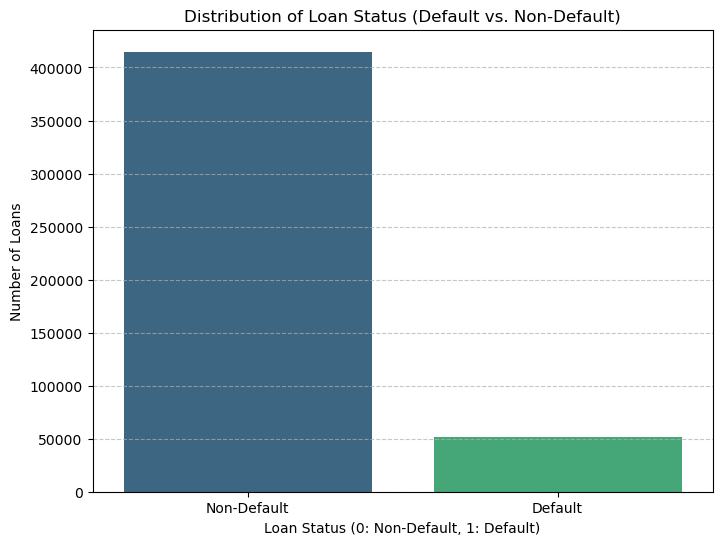


Percentage of Defaulted Loans: 11.03%


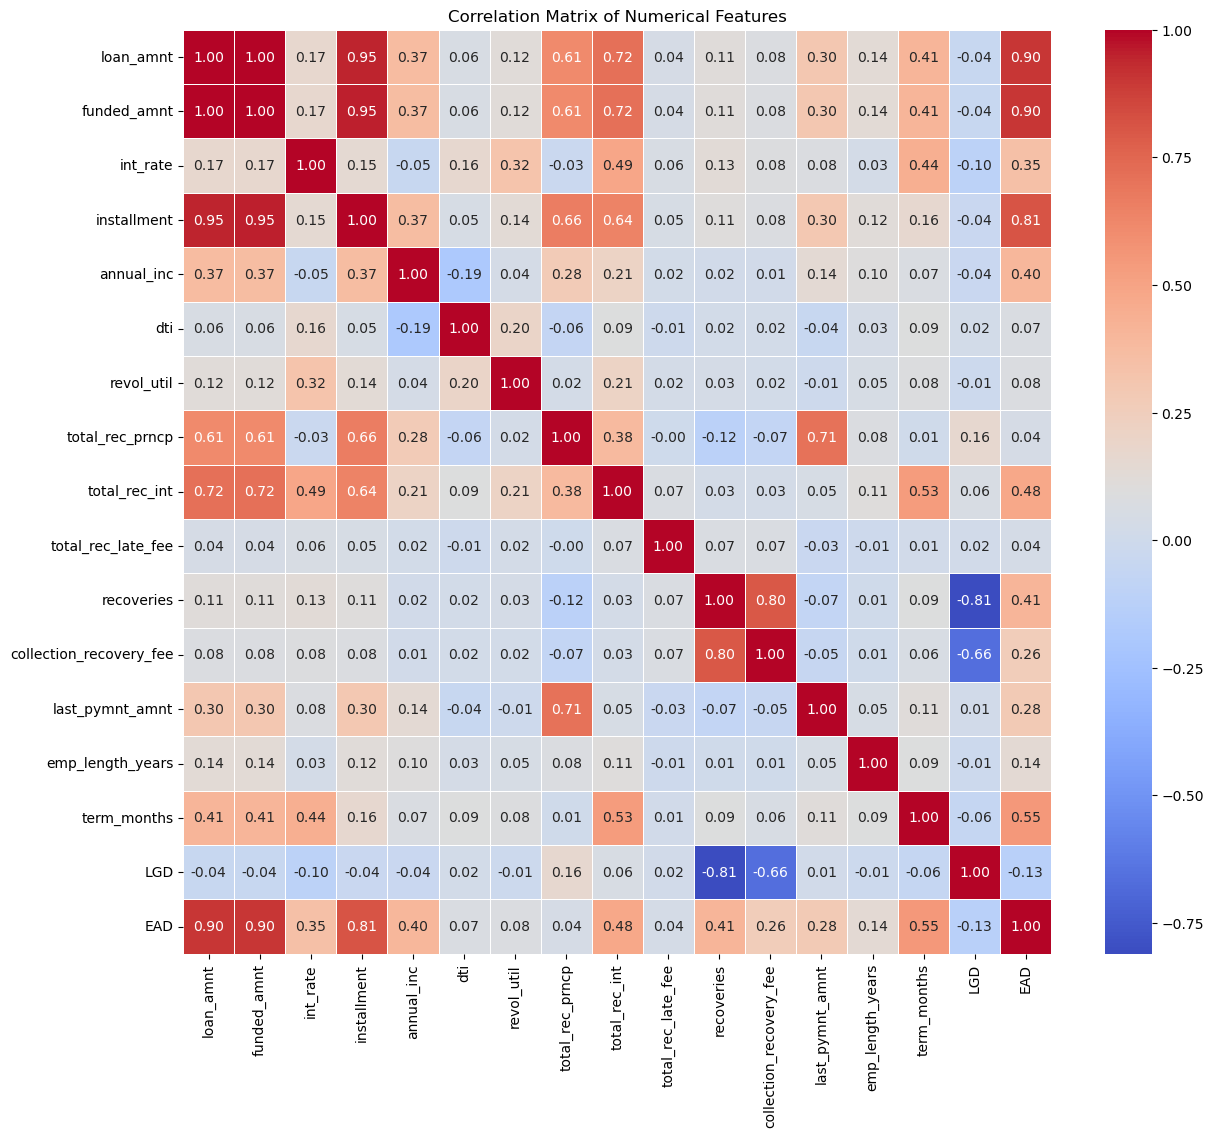


--- Insights on Correlation & Multicollinearity ---
Observe the heatmap for strong correlations (values close to 1 or -1).
High positive/negative correlations between independent variables (e.g., loan_amnt and funded_amnt) indicate multicollinearity.
Multicollinearity can affect model interpretability and stability, especially for linear models.
Skewness of loan_amnt: 0.73
Skewness of int_rate: 0.33
Skewness of annual_inc: 29.57
Skewness of dti: 0.19
Skewness of revol_util: -0.16


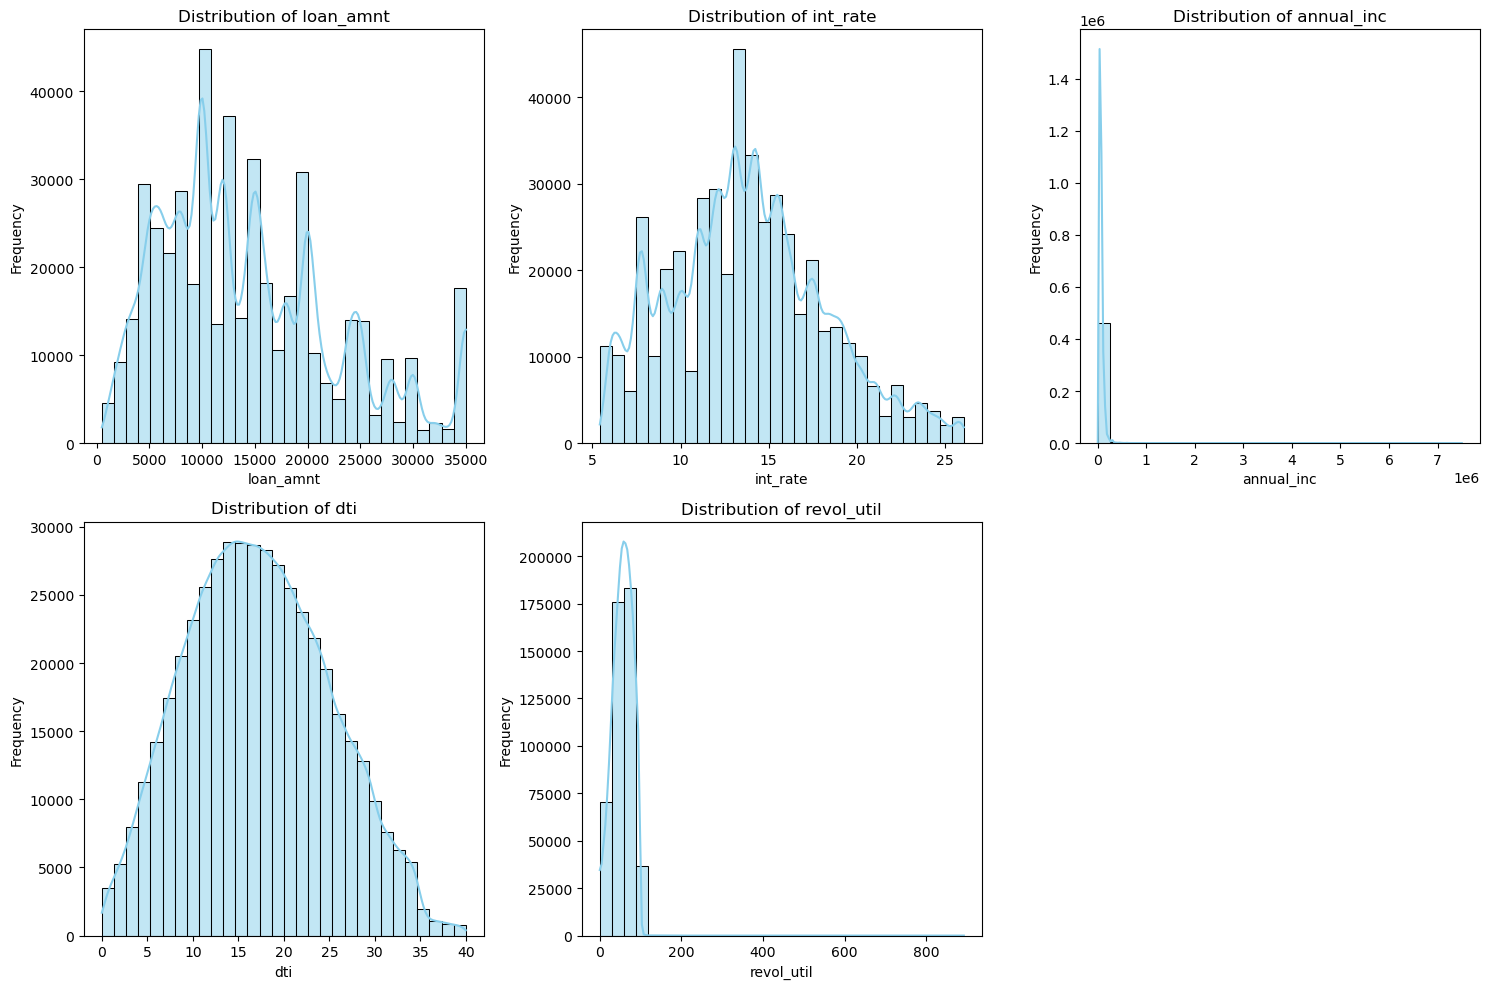

C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette='coolwarm')
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette='coolwarm')
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette='coolwarm')
C

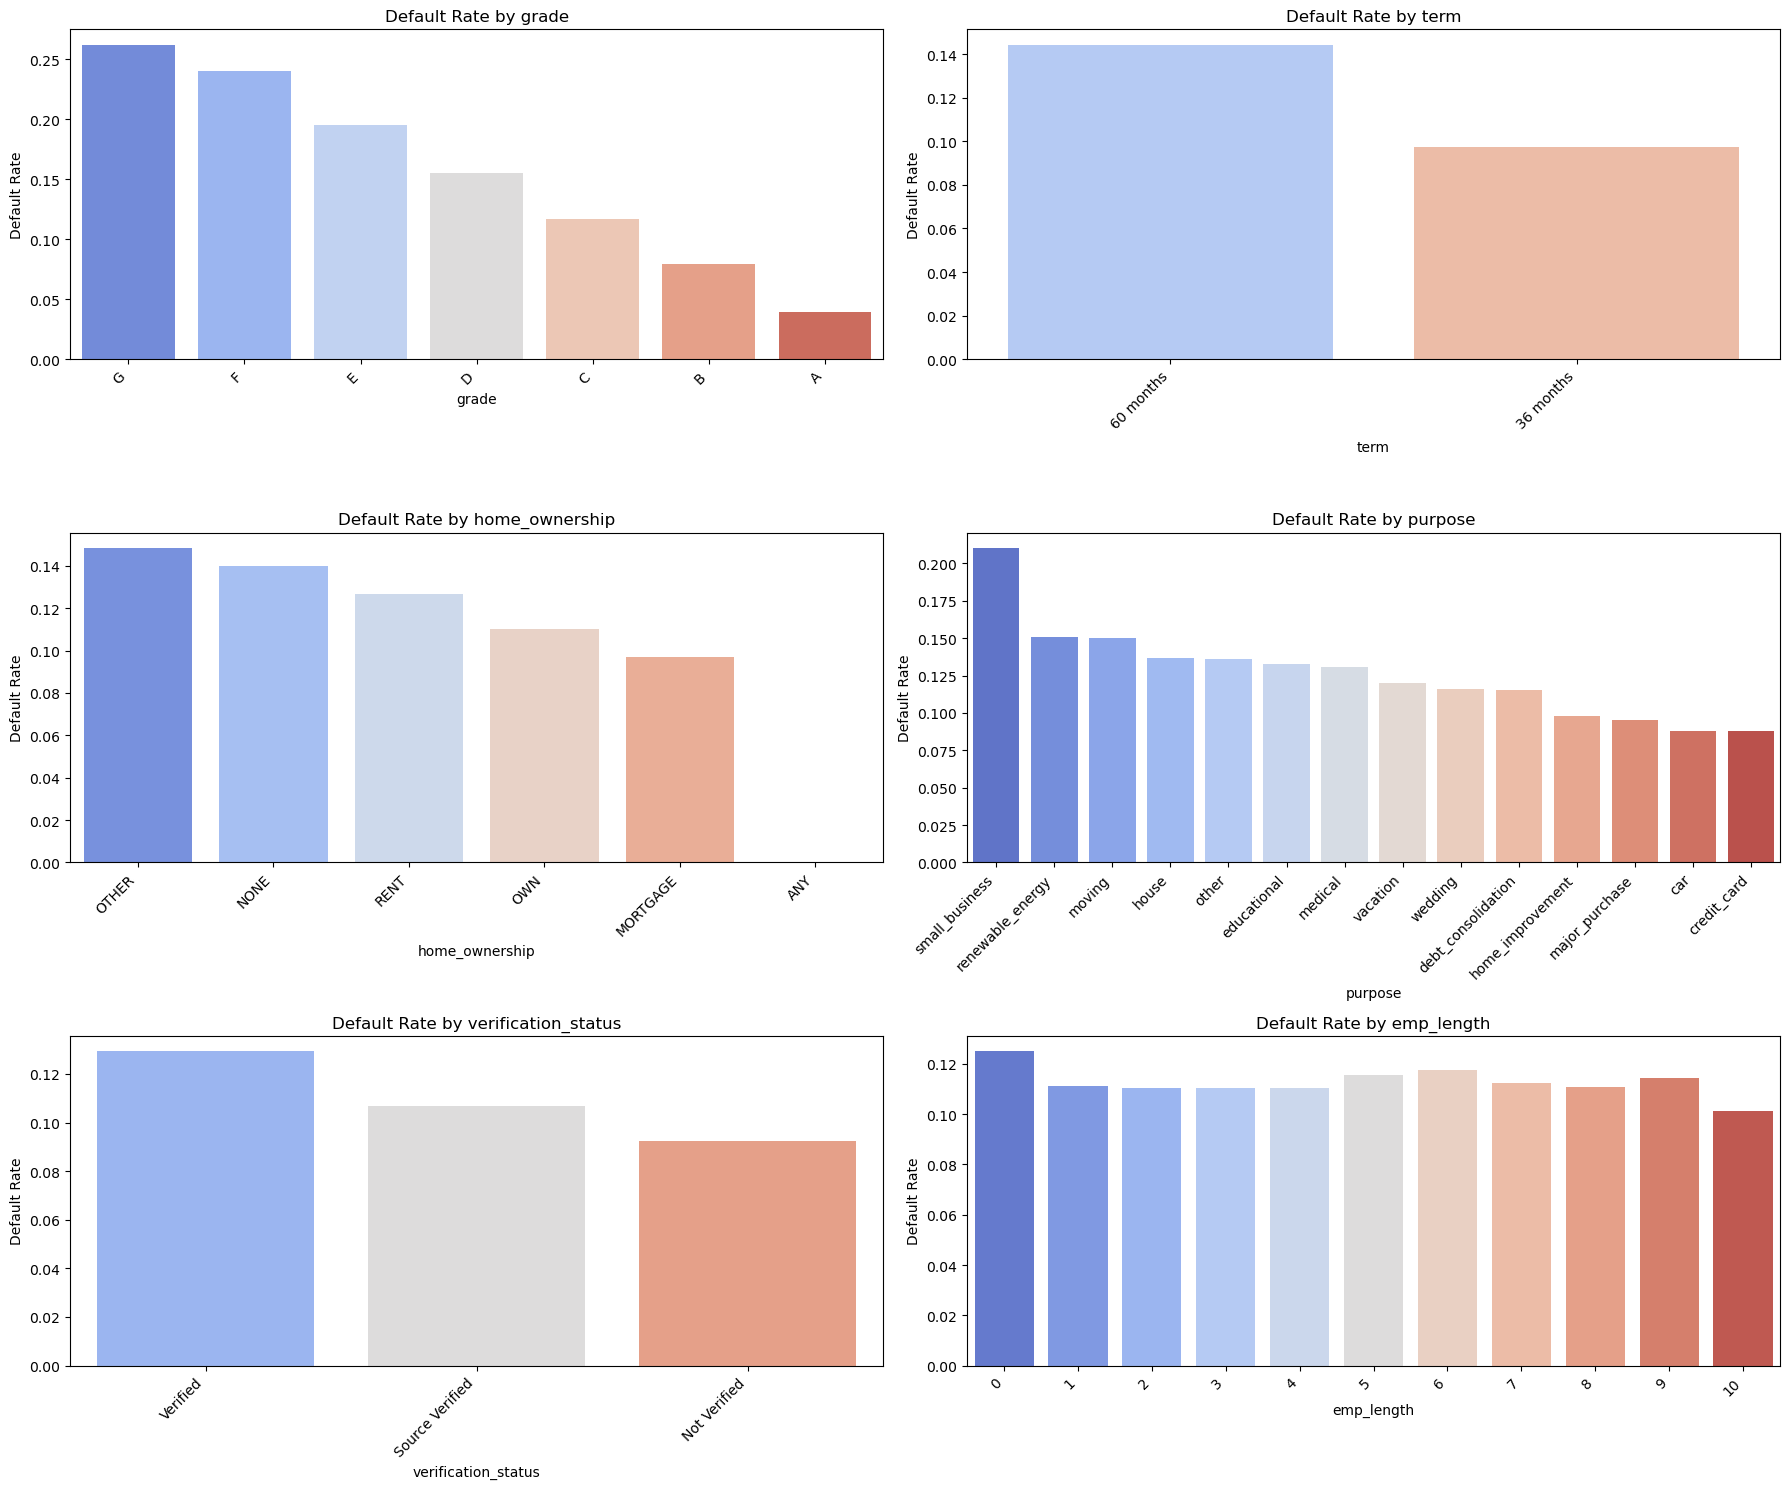


--- Analysis of LGD and EAD for Defaulted Loans ---


C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lgd.index, y=avg_lgd.values, palette='plasma')
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lgd.index, y=avg_lgd.values, palette='plasma')
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lgd.index, y=avg_lgd.values, palette='plasma')


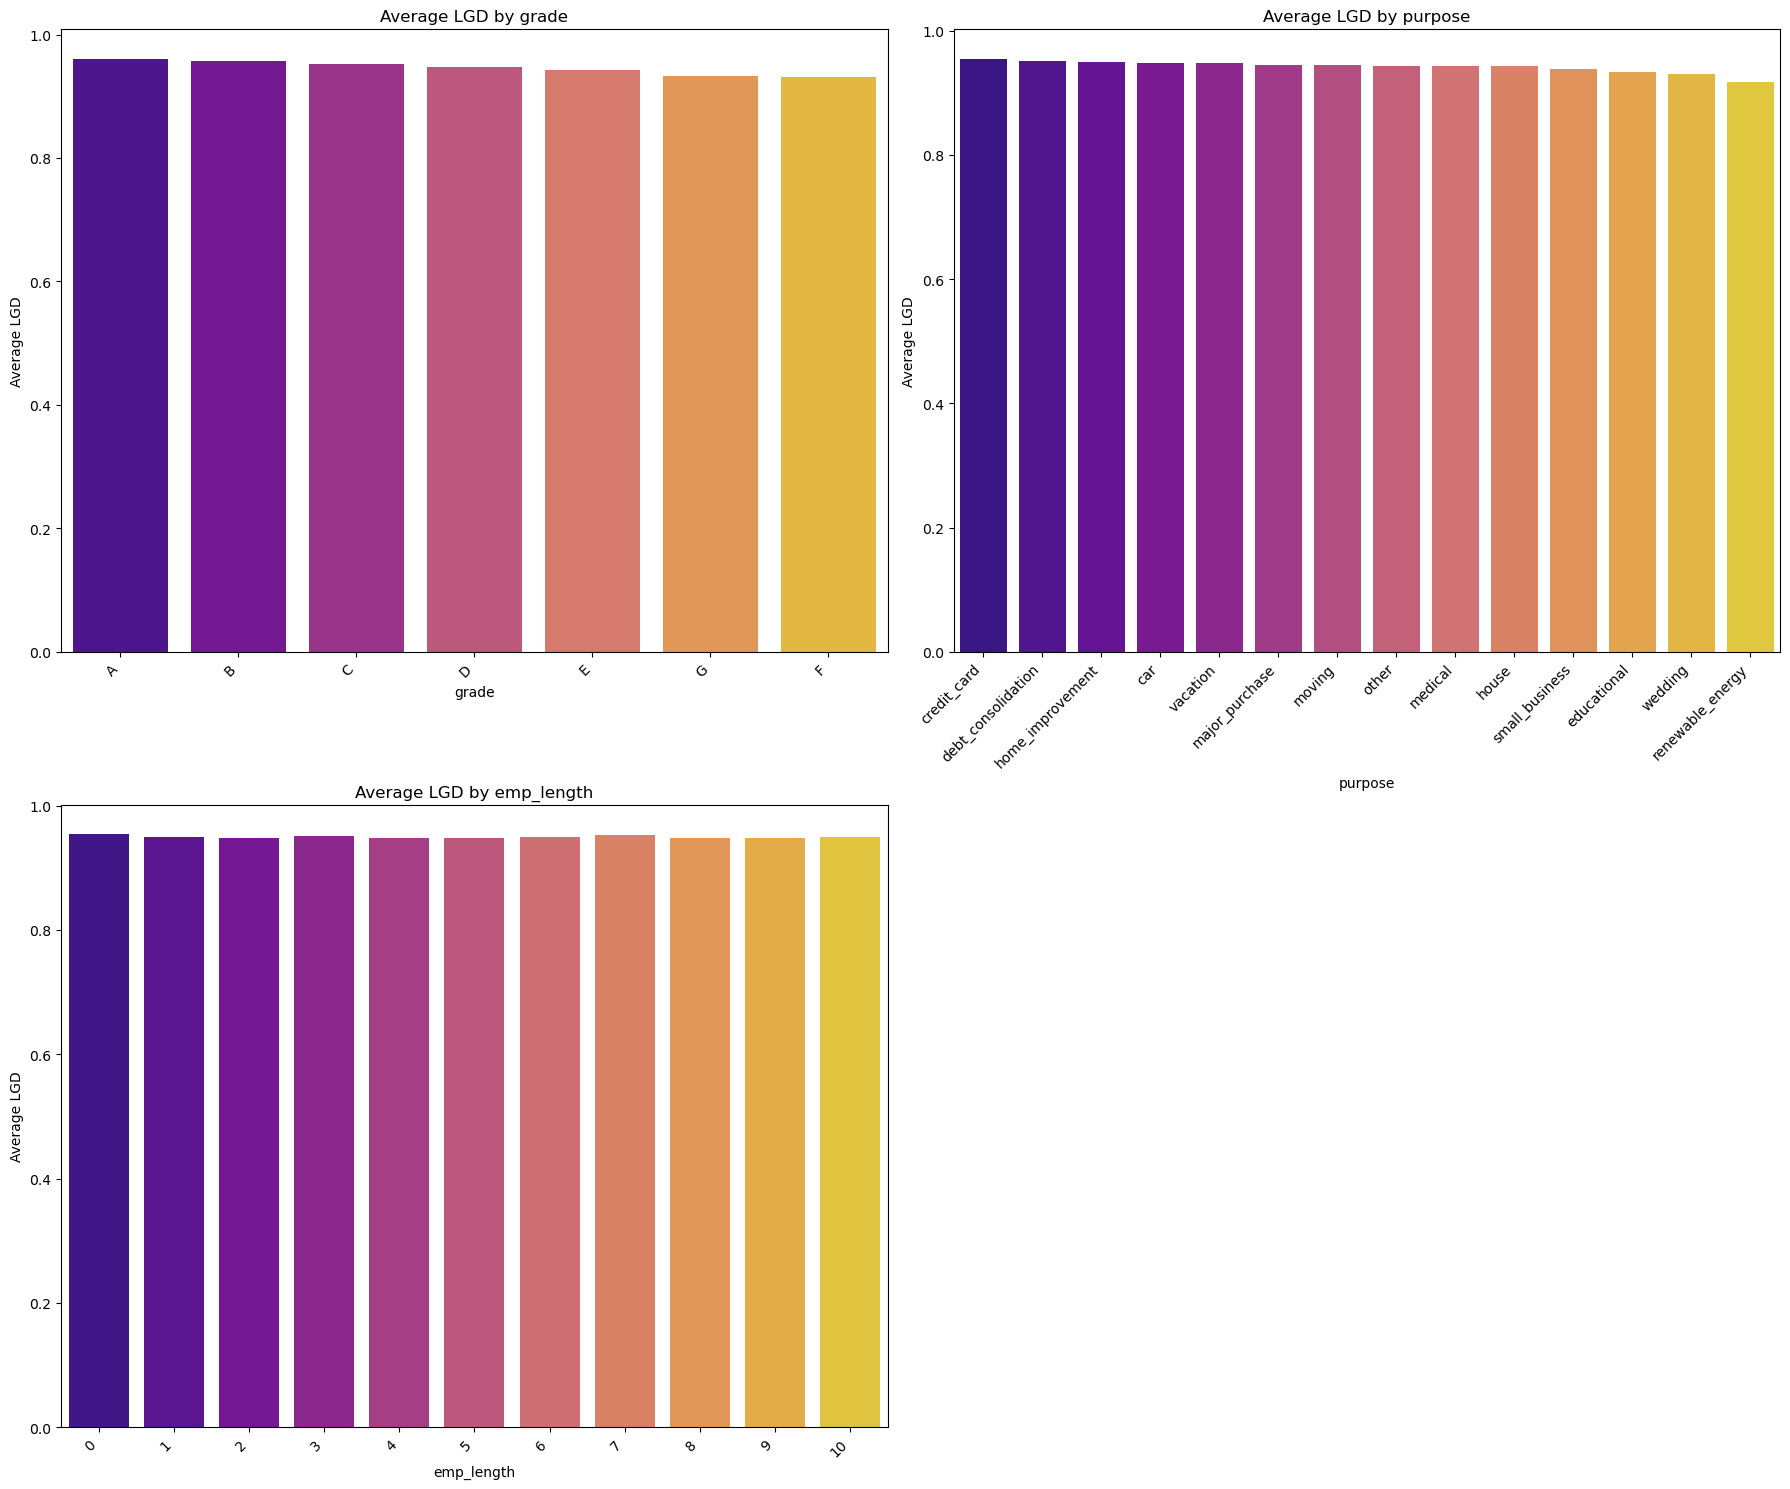

C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ead.index, y=avg_ead.values, palette='magma')
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ead.index, y=avg_ead.values, palette='magma')
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\3587408093.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ead.index, y=avg_ead.values, palette='magma')


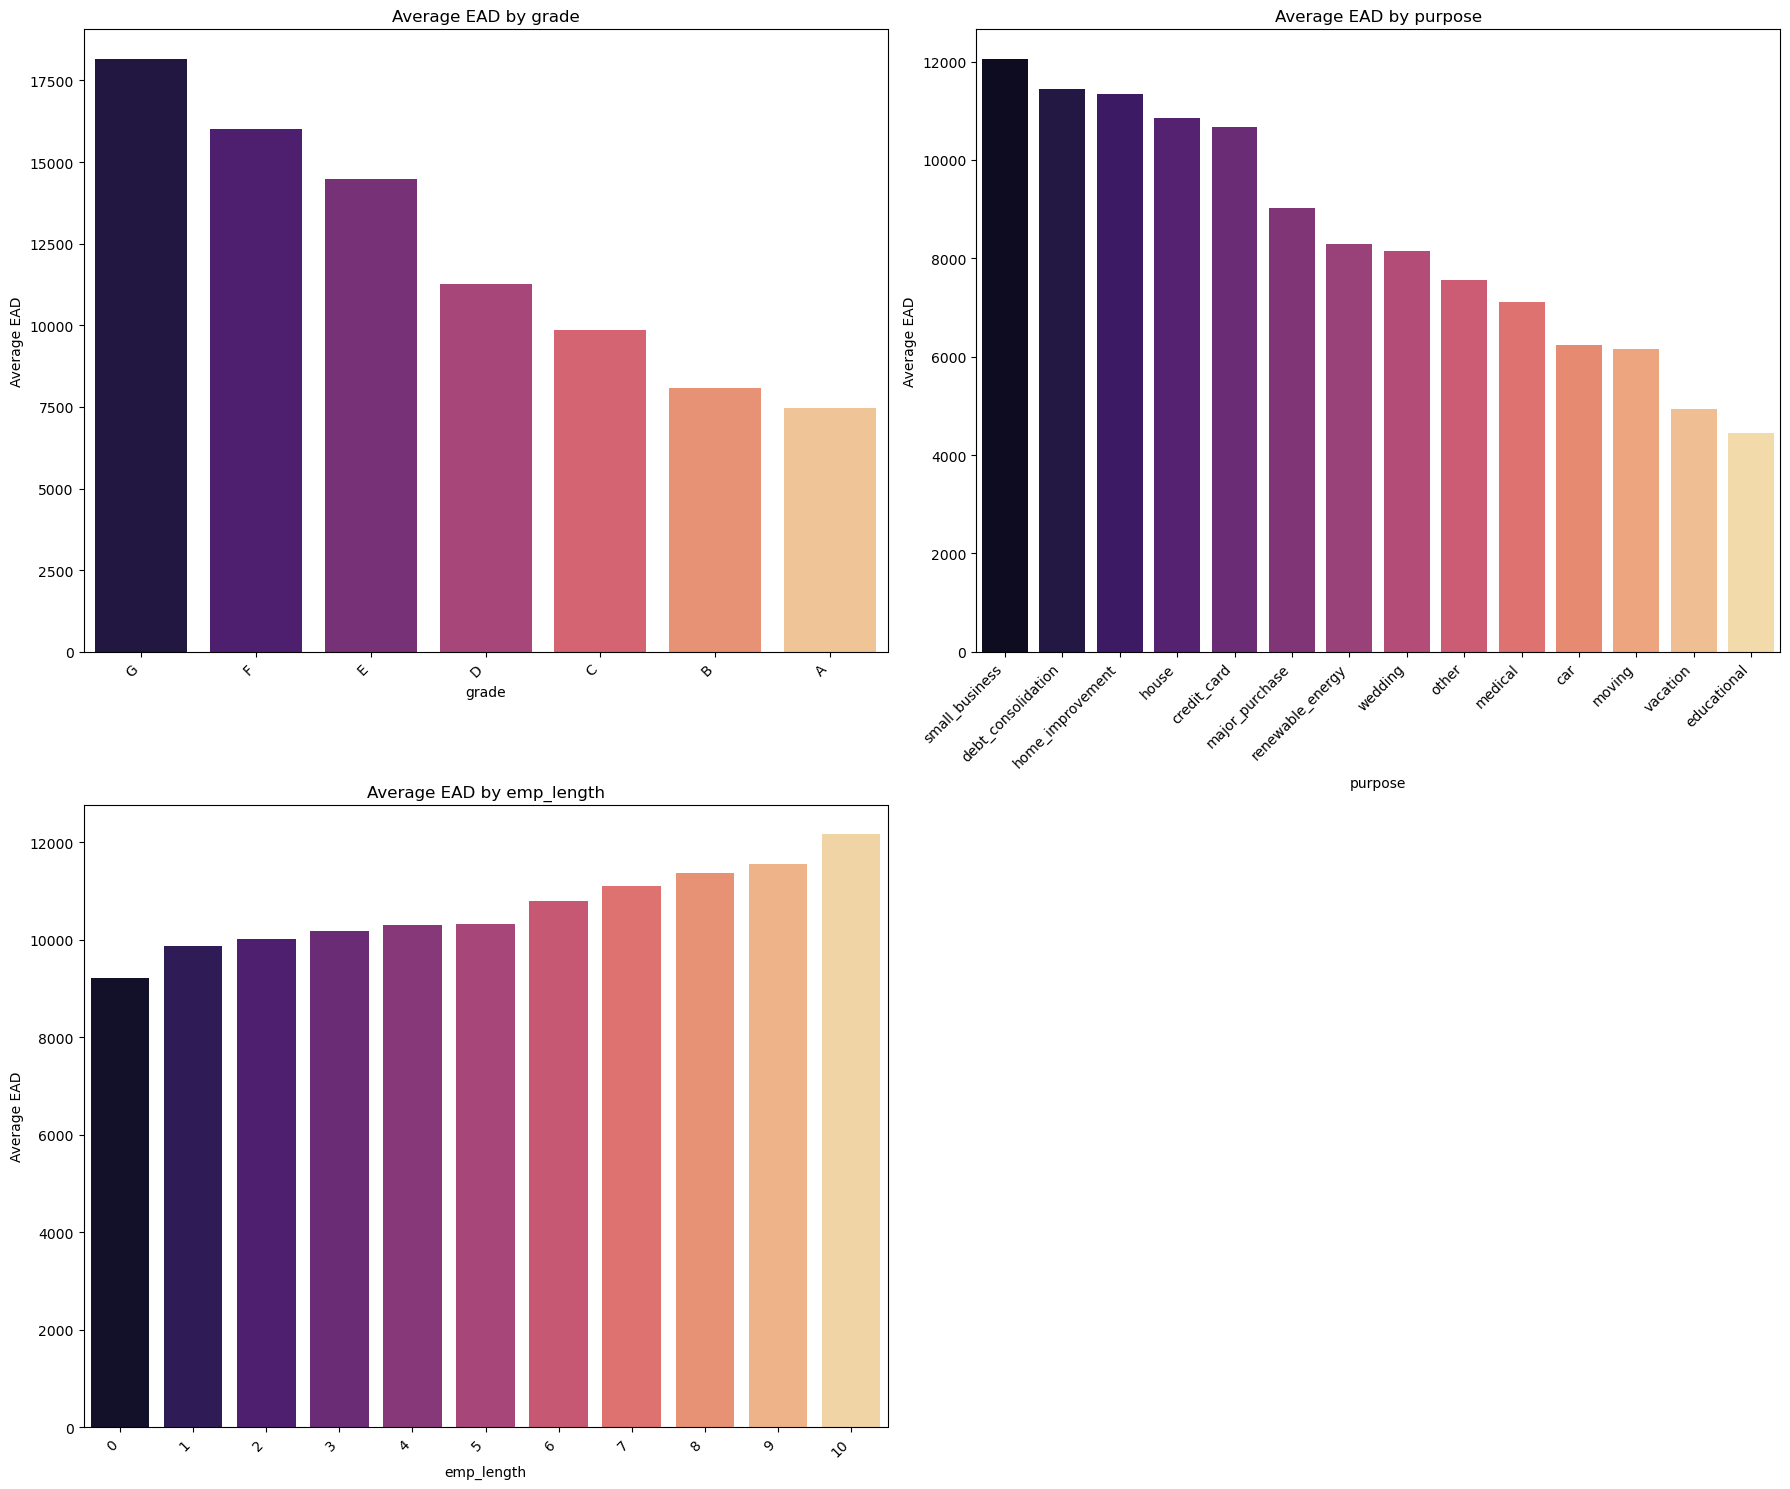


--- Exploratory Data Analysis Complete ---


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration and Data Loading ---
# Assuming the preprocessed data is available in a CSV file.
# Replace 'path/to/your/loan_data_2007_2014_preprocessed.csv' with the actual path if different.
loan_data = pd.read_csv("samp.csv", low_memory=False)

# Make a copy to avoid SettingWithCopyWarning during transformations
df = loan_data.copy()

# --- Preprocessing for EDA (if not already done in the loaded data) ---
# Convert 'term' to numerical for easier analysis if needed
df['term_months'] = df['term'].str.strip().str.extract('(\d+)').astype(float)

# Convert 'issue_d' to datetime for temporal analysis
#df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# Clean 'emp_length' for numerical analysis if needed, map to years
emp_length_map = {
    '10+ years': 10, '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9
}
df['emp_length_years'] = df['emp_length'].replace(emp_length_map).astype(float)


# --- Define Target Variables ---
# PD (Probability of Default): Binary indicator
# Map various 'loan_status' values to 1 (default) or 0 (non-default)
# This mapping should align with the preprocessing section
default_statuses = [
    'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)',
    'Does not meet the credit policy. Status: Charged Off'
]
df['is_default'] = df['loan_status'].apply(lambda x: 1 if x in default_statuses else 0)

# LGD (Loss Given Default): 1 - (recoveries / funded_amnt) for defaulted loans
# Handle cases where funded_amnt might be zero to avoid division by zero
df['LGD'] = np.where(
    (df['is_default'] == 1) & (df['funded_amnt'] > 0),
    1 - (df['recoveries'] / df['funded_amnt']),
    np.nan # LGD is only relevant for defaulted loans
)
# Cap LGD at 1 (100% loss) and floor at 0 (0% loss, full recovery)
df['LGD'] = df['LGD'].clip(0, 1)


# EAD (Exposure at Default): funded_amnt - total_rec_prncp for defaulted loans
df['EAD'] = np.where(
    (df['is_default'] == 1),
    df['funded_amnt'] - df['total_rec_prncp'],
    np.nan # EAD is only relevant for defaulted loans
)
# Ensure EAD is not negative (e.g., if total_rec_prncp > funded_amnt due to fees/interest)
df['EAD'] = df['EAD'].clip(lower=0)


print("--- Target Variable Definitions Complete ---")
print(f"Defaulted loans count: {df['is_default'].sum()}")
print(f"Non-defaulted loans count: {(df.shape[0] - df['is_default'].sum())}")
print(f"LGD (first 5 defaulted loans):\n{df[df['is_default']==1]['LGD'].head()}")
print(f"EAD (first 5 defaulted loans):\n{df[df['is_default']==1]['EAD'].head()}")


# --- 1. Class Imbalance Visualization (PD) ---
plt.figure(figsize=(8, 6))
sns.countplot(x='is_default', data=df, palette='viridis')
plt.title('Distribution of Loan Status (Default vs. Non-Default)')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Number of Loans')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

default_percentage = df['is_default'].mean() * 100
print(f"\nPercentage of Defaulted Loans: {default_percentage:.2f}%")


# --- 2. Correlation Matrix for Numerical Features ---
# Select numerical features for correlation analysis
numerical_cols = [
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
    'dti', 'revol_util', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
    'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
    'emp_length_years', 'term_months', 'LGD', 'EAD'
]
# Filter out columns that might not exist in the dummy data or were dropped
numerical_cols = [col for col in numerical_cols if col in df.columns]

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\n--- Insights on Correlation & Multicollinearity ---")
print("Observe the heatmap for strong correlations (values close to 1 or -1).")
print("High positive/negative correlations between independent variables (e.g., loan_amnt and funded_amnt) indicate multicollinearity.")
print("Multicollinearity can affect model interpretability and stability, especially for linear models.")


# --- 3. Distribution Plots (Univariate Analysis) ---
features_for_distribution = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_distribution):
    if feature in df.columns:
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[feature].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        print(f"Skewness of {feature}: {df[feature].skew():.2f}")
    else:
        print(f"Warning: Column '{feature}' not found in DataFrame for distribution plot.")
plt.tight_layout()
plt.show()


# --- 4. Default Rates by Category (Bivariate Analysis) ---
categorical_features = ['grade', 'term', 'home_ownership', 'purpose', 'verification_status', 'emp_length']

plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    if feature in df.columns:
        plt.subplot(3, 2, i + 1)
        # Calculate default rate for each category
        default_rates = df.groupby(feature)['is_default'].mean().sort_values(ascending=False)
        sns.barplot(x=default_rates.index, y=default_rates.values, palette='coolwarm')
        plt.title(f'Default Rate by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Default Rate')
        plt.xticks(rotation=45, ha='right')
    else:
        print(f"Warning: Column '{feature}' not found in DataFrame for default rate analysis.")
plt.tight_layout()
plt.show()


# --- 5. Temporal Trends in Default Rates ---


# --- 6. Target Variable Analysis by Categories (LGD & EAD for defaulted loans) ---
# Filter for defaulted loans first
defaulted_df = df[df['is_default'] == 1].copy()

# Ensure there are defaulted loans to analyze LGD/EAD
if not defaulted_df.empty:
    print("\n--- Analysis of LGD and EAD for Defaulted Loans ---")

    # LGD by categorical features
    lgd_categorical_features = ['grade', 'purpose', 'emp_length'] # Add 'annual_inc_binned' if available and binned
    plt.figure(figsize=(18, 15))
    for i, feature in enumerate(lgd_categorical_features):
        if feature in defaulted_df.columns:
            plt.subplot(2, 2, i + 1)
            avg_lgd = defaulted_df.groupby(feature)['LGD'].mean().sort_values(ascending=False)
            sns.barplot(x=avg_lgd.index, y=avg_lgd.values, palette='plasma')
            plt.title(f'Average LGD by {feature}')
            plt.xlabel(feature)
            plt.ylabel('Average LGD')
            plt.xticks(rotation=45, ha='right')
        else:
            print(f"Warning: Column '{feature}' not found in defaulted DataFrame for LGD analysis.")
    plt.tight_layout()
    plt.show()

    # EAD by categorical features
    ead_categorical_features = ['grade', 'purpose', 'emp_length'] # Add 'annual_inc_binned' if available and binned
    plt.figure(figsize=(18, 15))
    for i, feature in enumerate(ead_categorical_features):
        if feature in defaulted_df.columns:
            plt.subplot(2, 2, i + 1)
            avg_ead = defaulted_df.groupby(feature)['EAD'].mean().sort_values(ascending=False)
            sns.barplot(x=avg_ead.index, y=avg_ead.values, palette='magma')
            plt.title(f'Average EAD by {feature}')
            plt.xlabel(feature)
            plt.ylabel('Average EAD')
            plt.xticks(rotation=45, ha='right')
        else:
            print(f"Warning: Column '{feature}' not found in defaulted DataFrame for EAD analysis.")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo defaulted loans found in the dataset to perform LGD and EAD analysis.")

print("\n--- Exploratory Data Analysis Complete ---")

<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:33: SyntaxWarning: invalid escape sequence '\d'
  df['term_months'] = df['term'].str.strip().str.extract('(\d+)').astype(float)


--- Target Variable Definitions Complete ---
Defaulted loans count: 51425
Non-defaulted loans count: 414860
LGD (first 5 defaulted loans):
1     0.953168
8     0.966239
9     0.949900
12    0.950633
14    0.935490
Name: LGD, dtype: float64
EAD (first 5 defaulted loans):
1     2043.54
8     5437.98
9     4701.52
12    7743.86
14    4566.53
Name: EAD, dtype: float64


C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_default', data=df, palette='viridis')


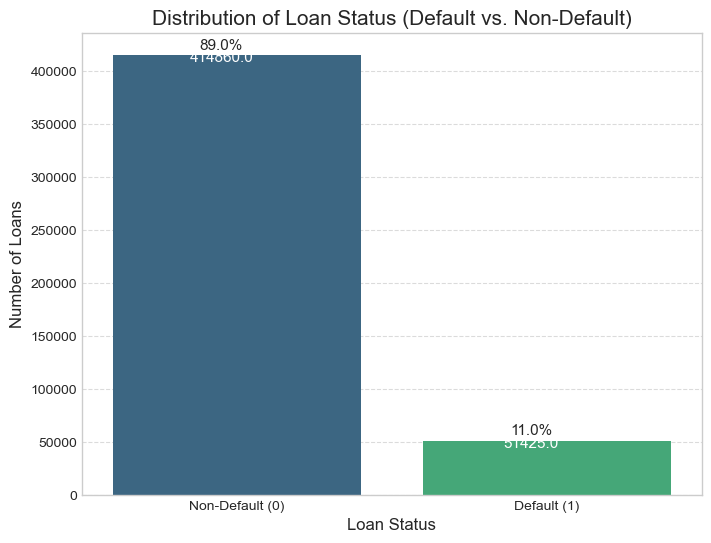


Percentage of Defaulted Loans: 11.03%


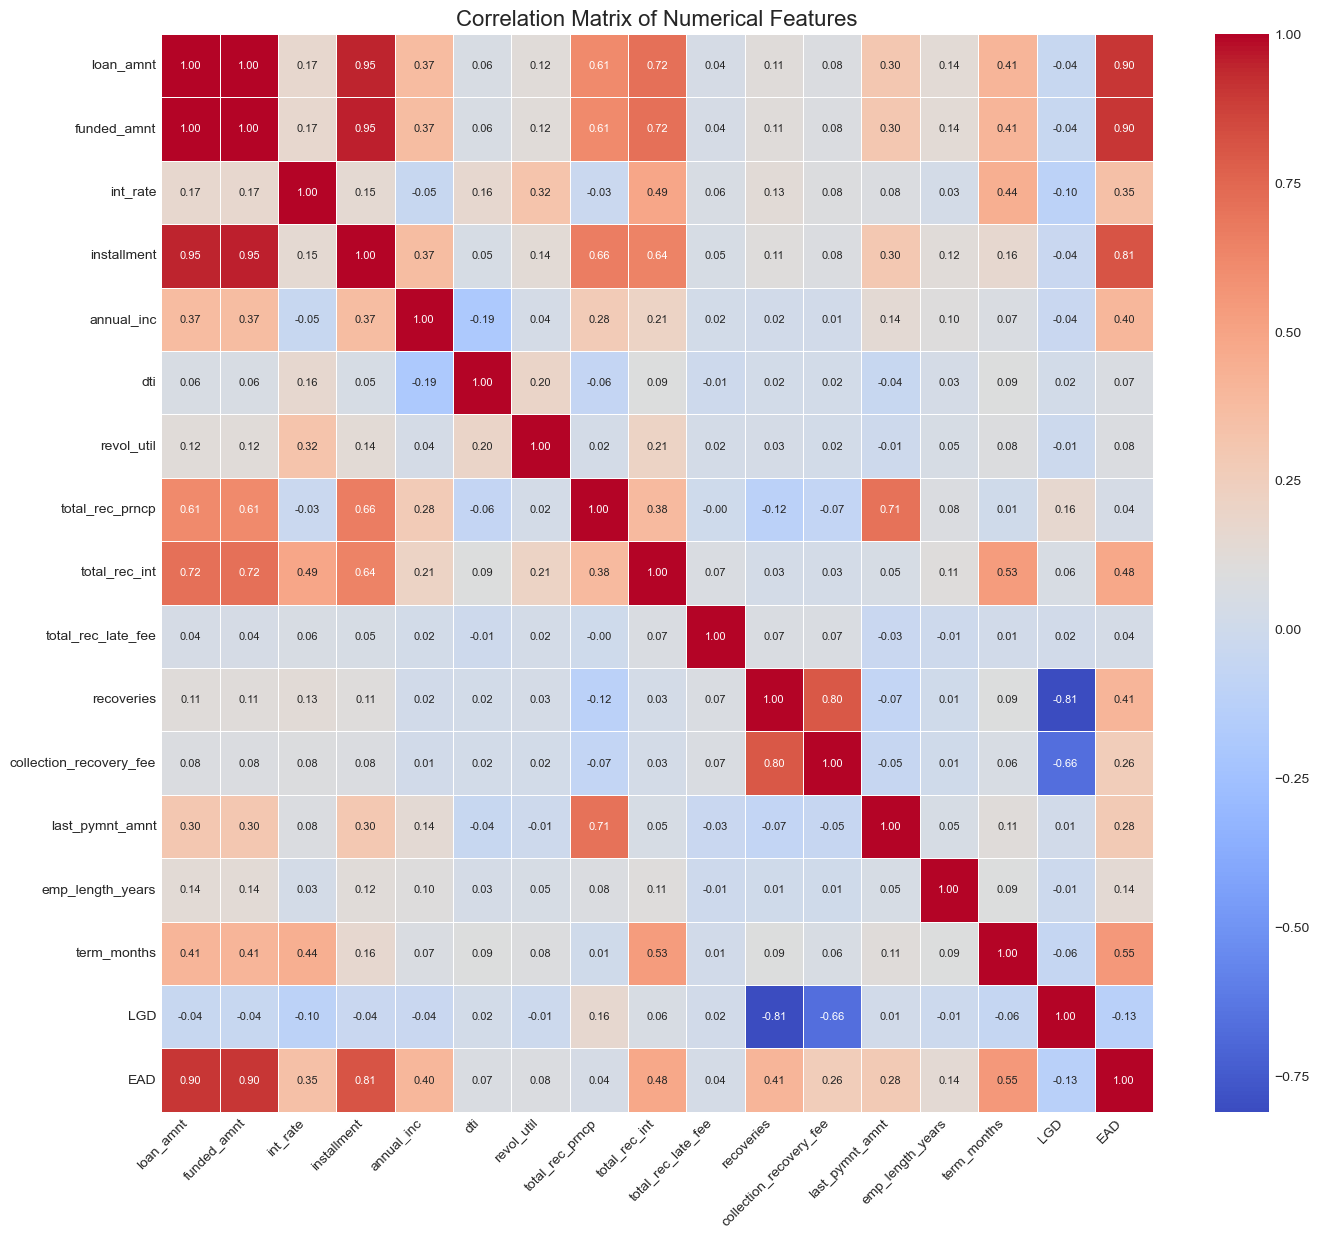


--- Insights on Correlation & Multicollinearity ---
Observe the heatmap for strong correlations (values close to 1 or -1).
High positive/negative correlations between independent variables (e.g., loan_amnt and funded_amnt) indicate multicollinearity.
Multicollinearity can affect model interpretability and stability, especially for linear models.
Skewness of loan_amnt: 0.73
Skewness of int_rate: 0.33
Skewness of annual_inc: 29.57
Skewness of dti: 0.19
Skewness of revol_util: -0.16


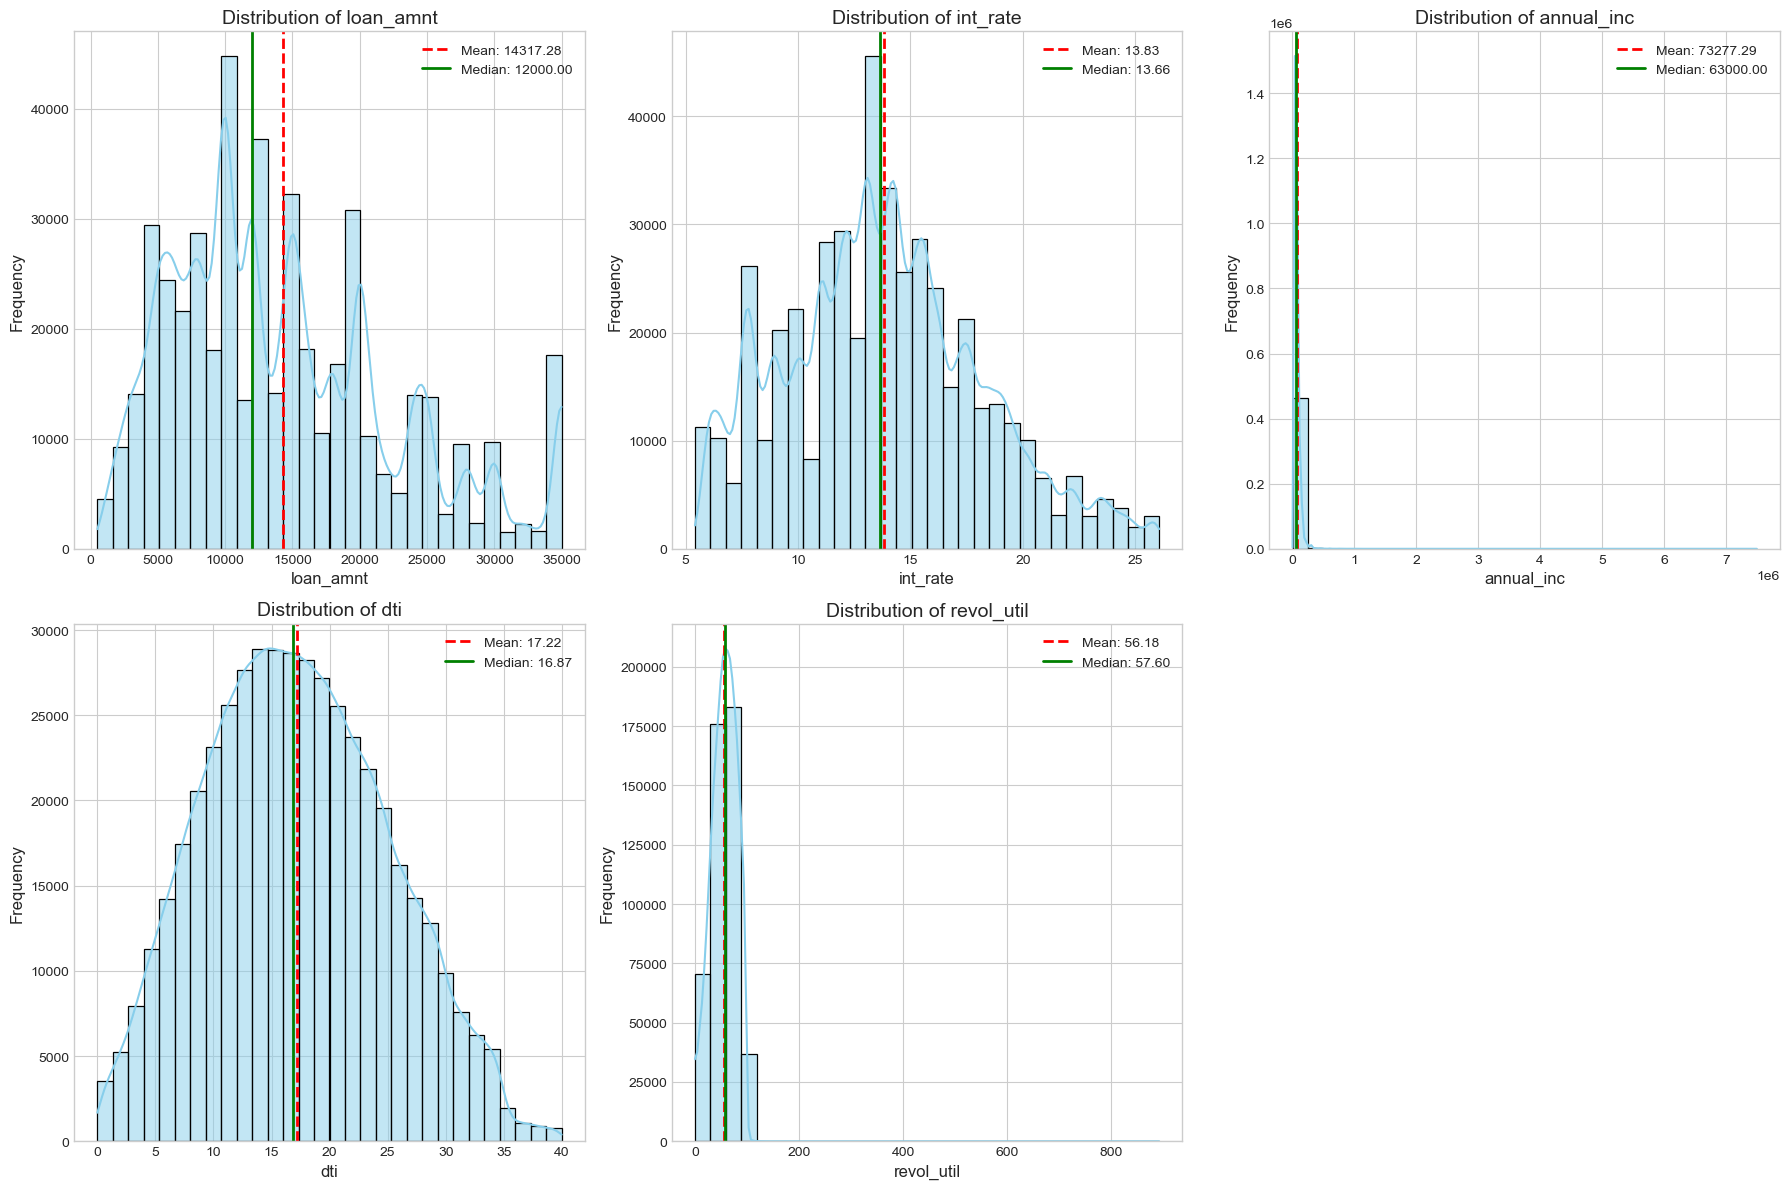

C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:217: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=default_rates.index, y=default_rates.values, palette='coolwarm_r') # ENHANCEMENT: Reversed palette for higher = warmer
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:217: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=default_rates.index, y=default_rates.values, palette='coolwarm_r') # ENHANCEMENT: Reversed palette for higher = warmer
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:217: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `

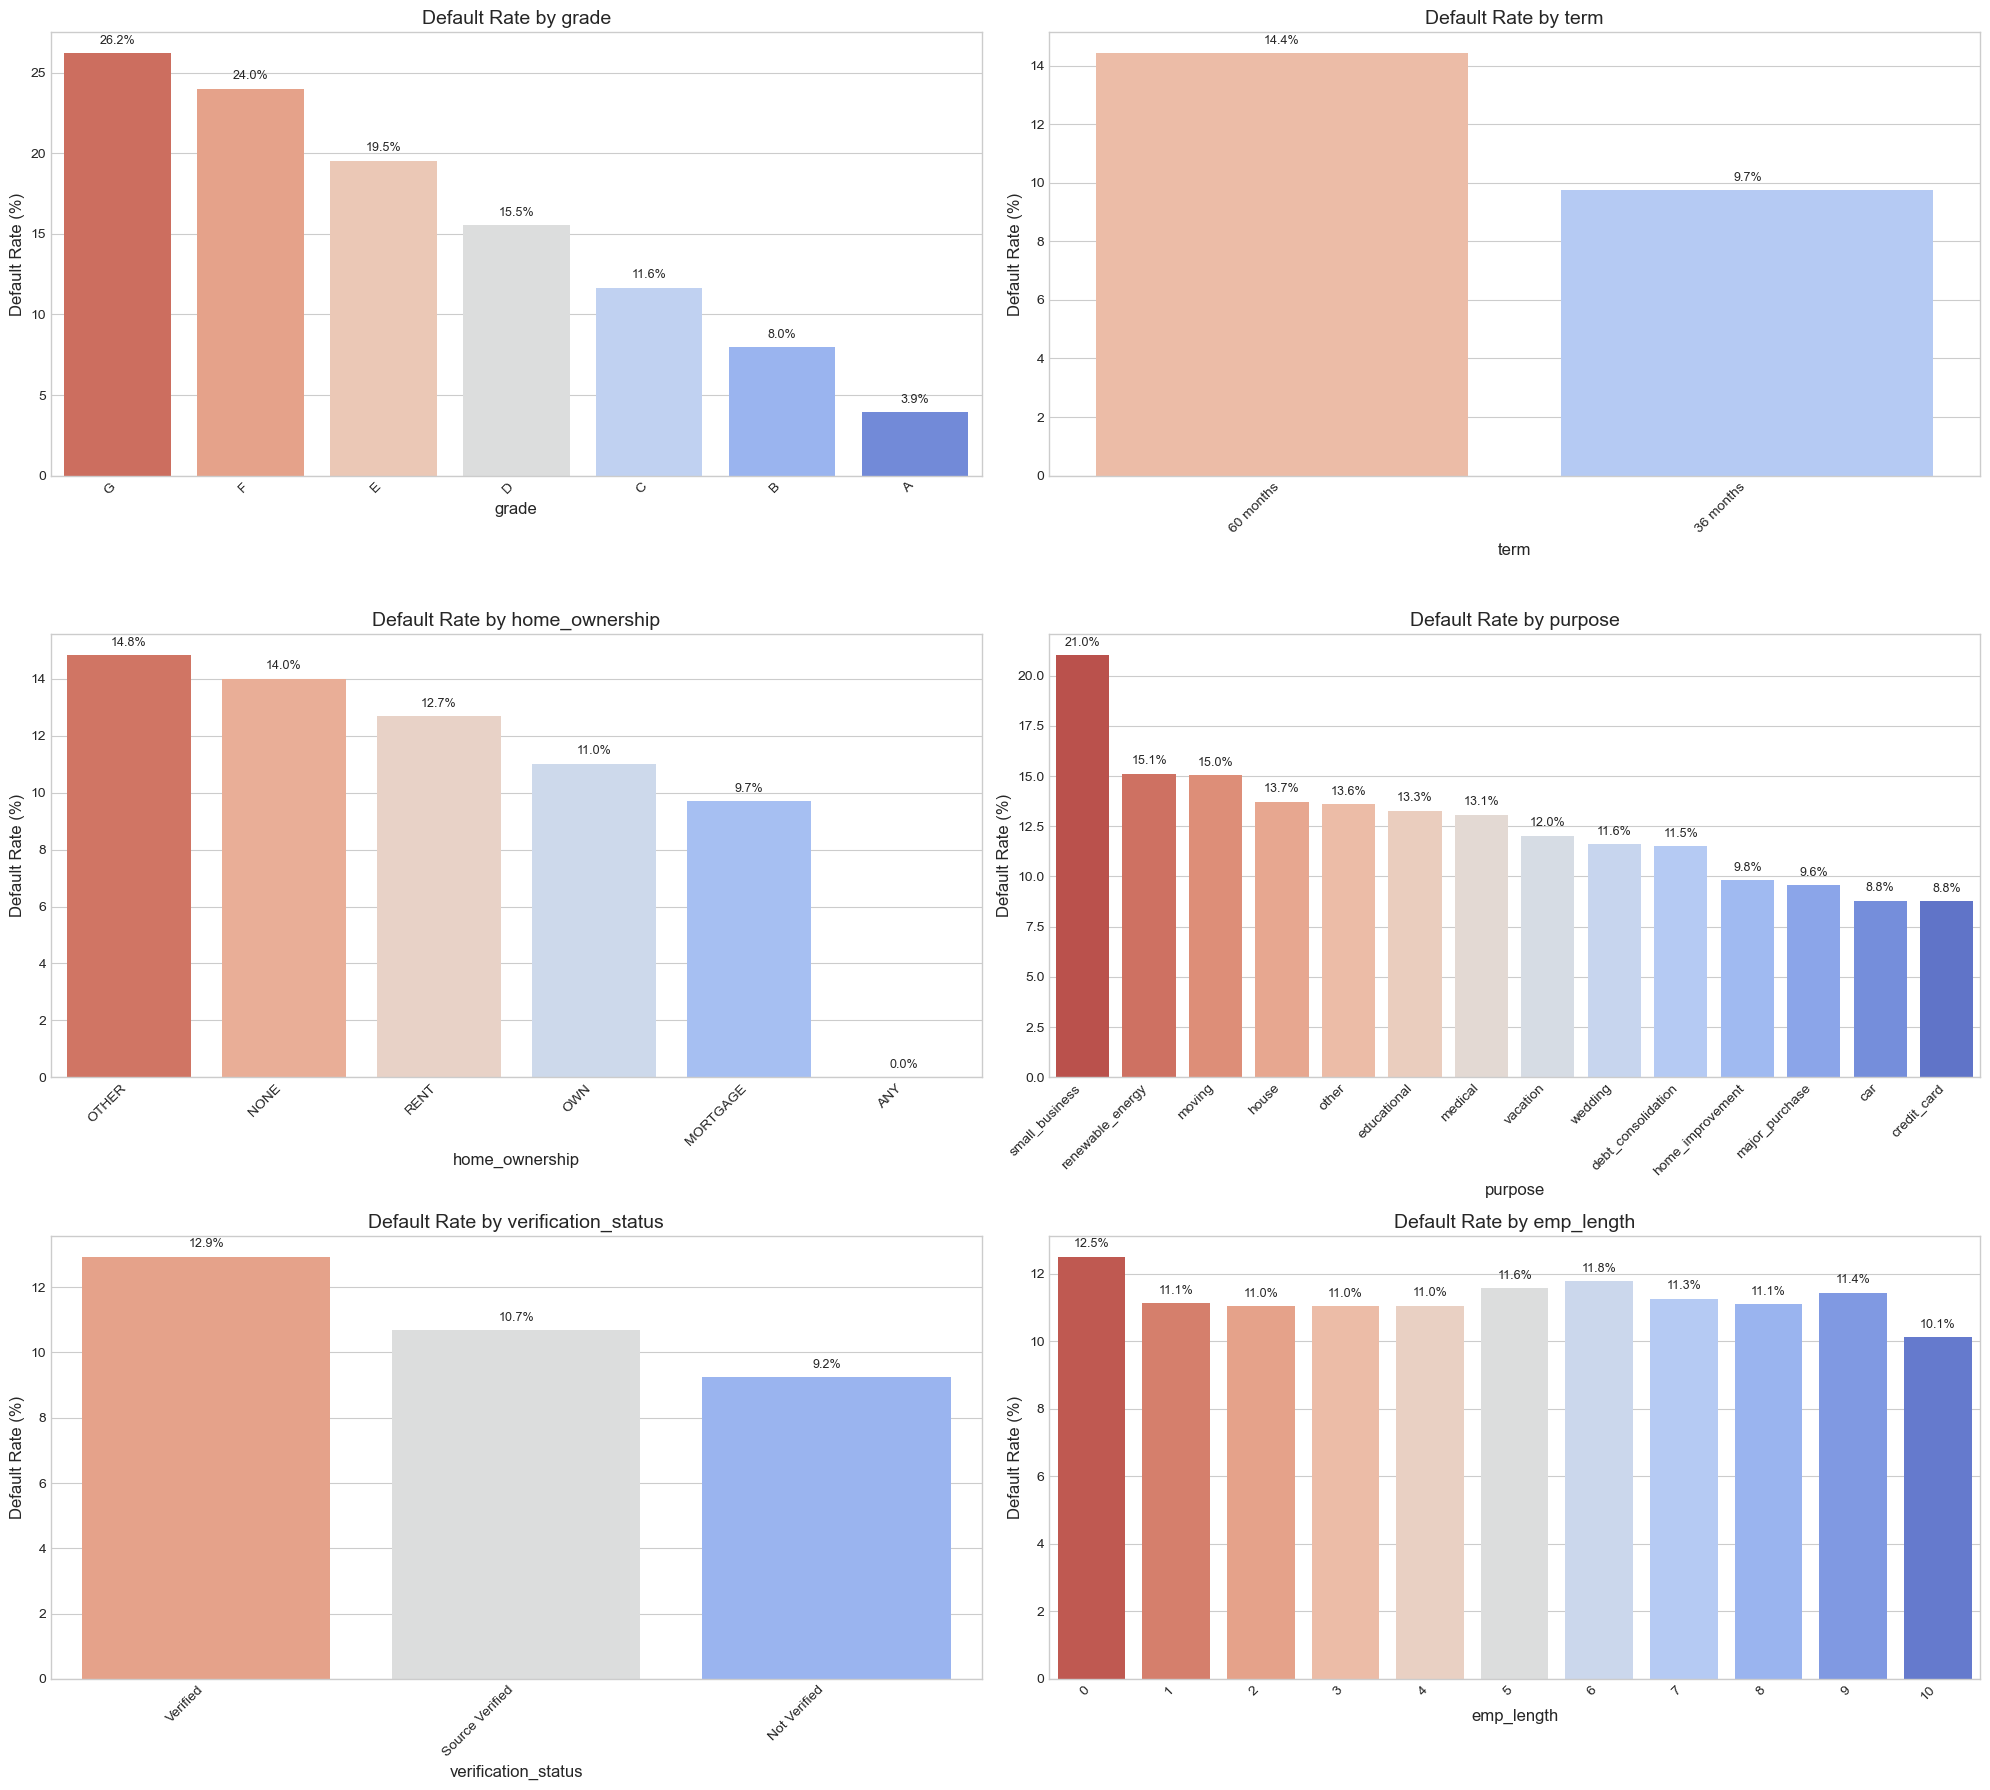

Skipping Temporal Trends analysis as 'issue_year' or 'is_default' data is not available or processed.

--- Analysis of LGD and EAD for Defaulted Loans ---


C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:311: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_lgd.index, y=avg_lgd.values, palette='plasma_r') # ENHANCEMENT: _r for reversed higher LGD = warmer
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:311: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_lgd.index, y=avg_lgd.values, palette='plasma_r') # ENHANCEMENT: _r for reversed higher LGD = warmer
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:311: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

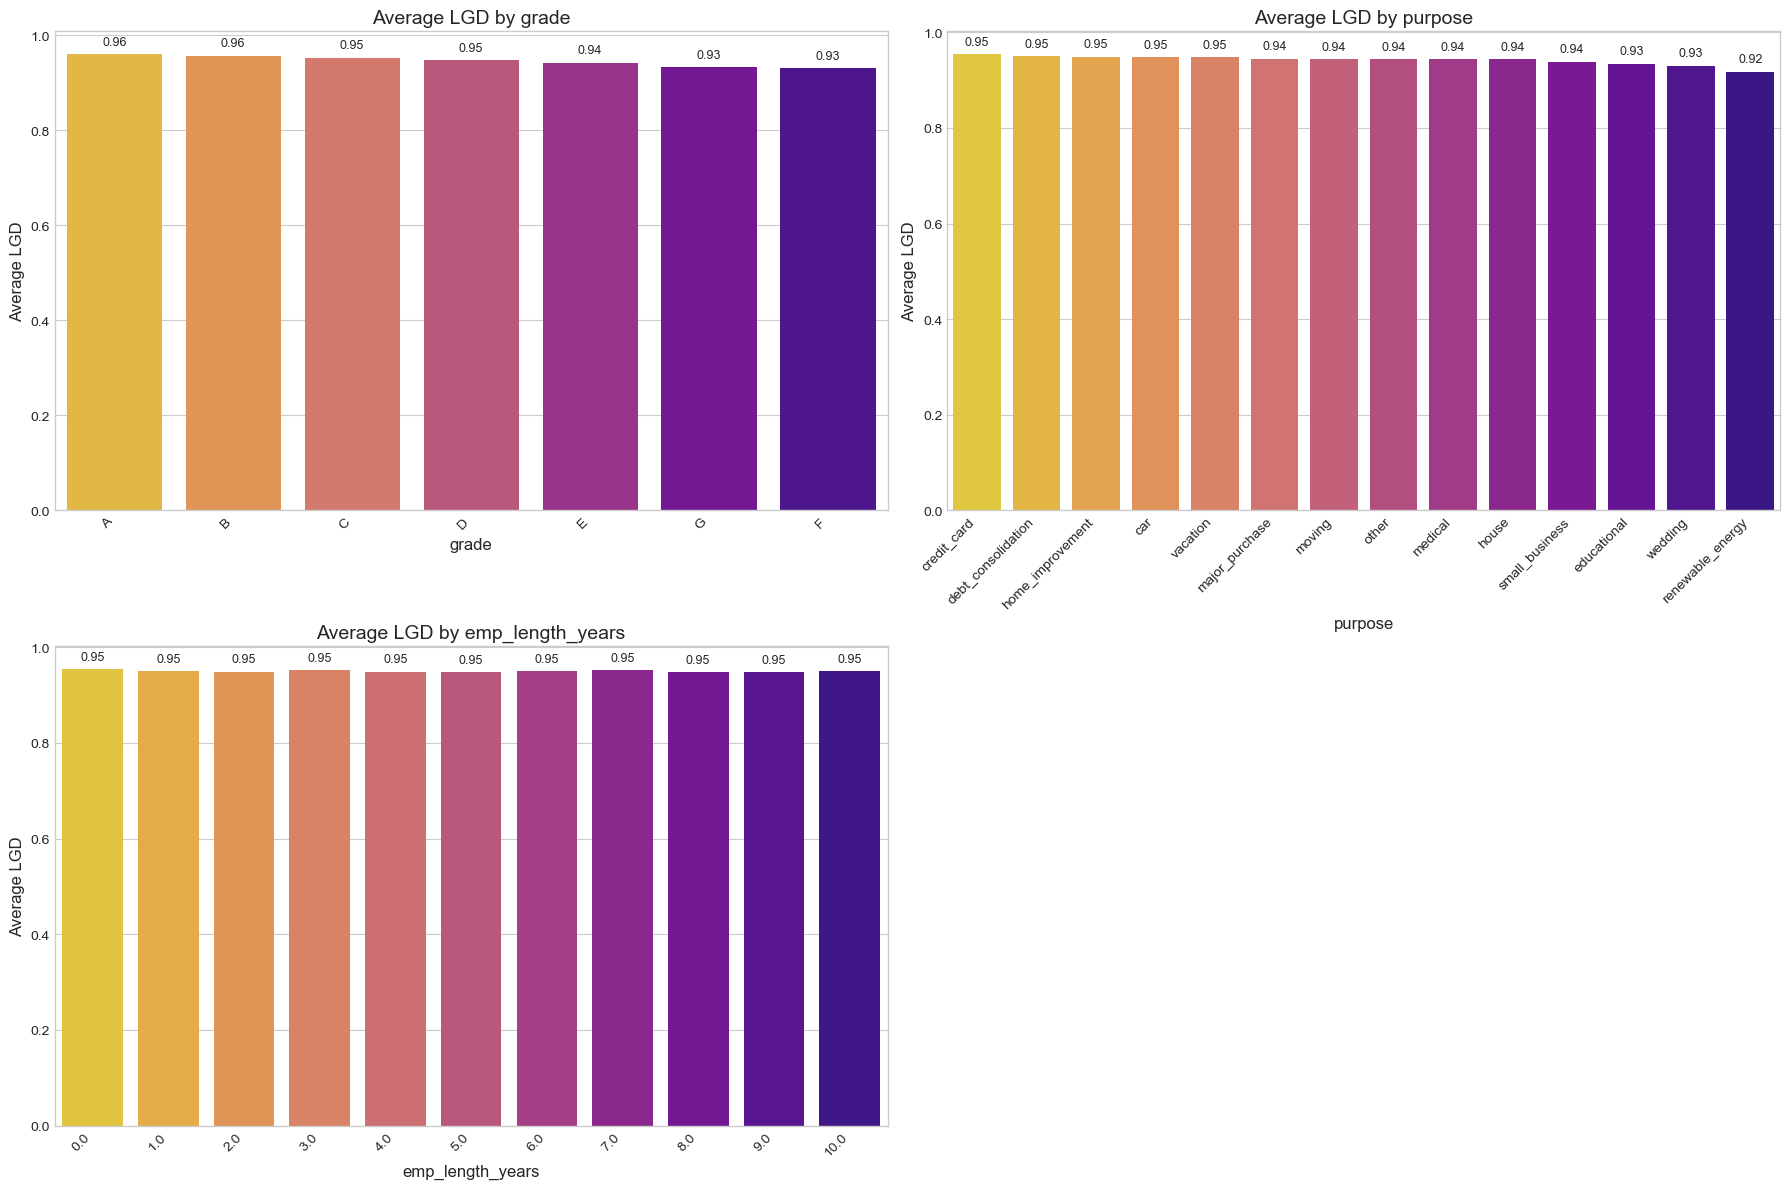

C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:346: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_ead.index, y=avg_ead.values, palette='magma_r') # ENHANCEMENT: _r for reversed higher EAD = warmer
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:346: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_ead.index, y=avg_ead.values, palette='magma_r') # ENHANCEMENT: _r for reversed higher EAD = warmer
C:\Users\valan\AppData\Local\Temp\ipykernel_26440\2755323197.py:346: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

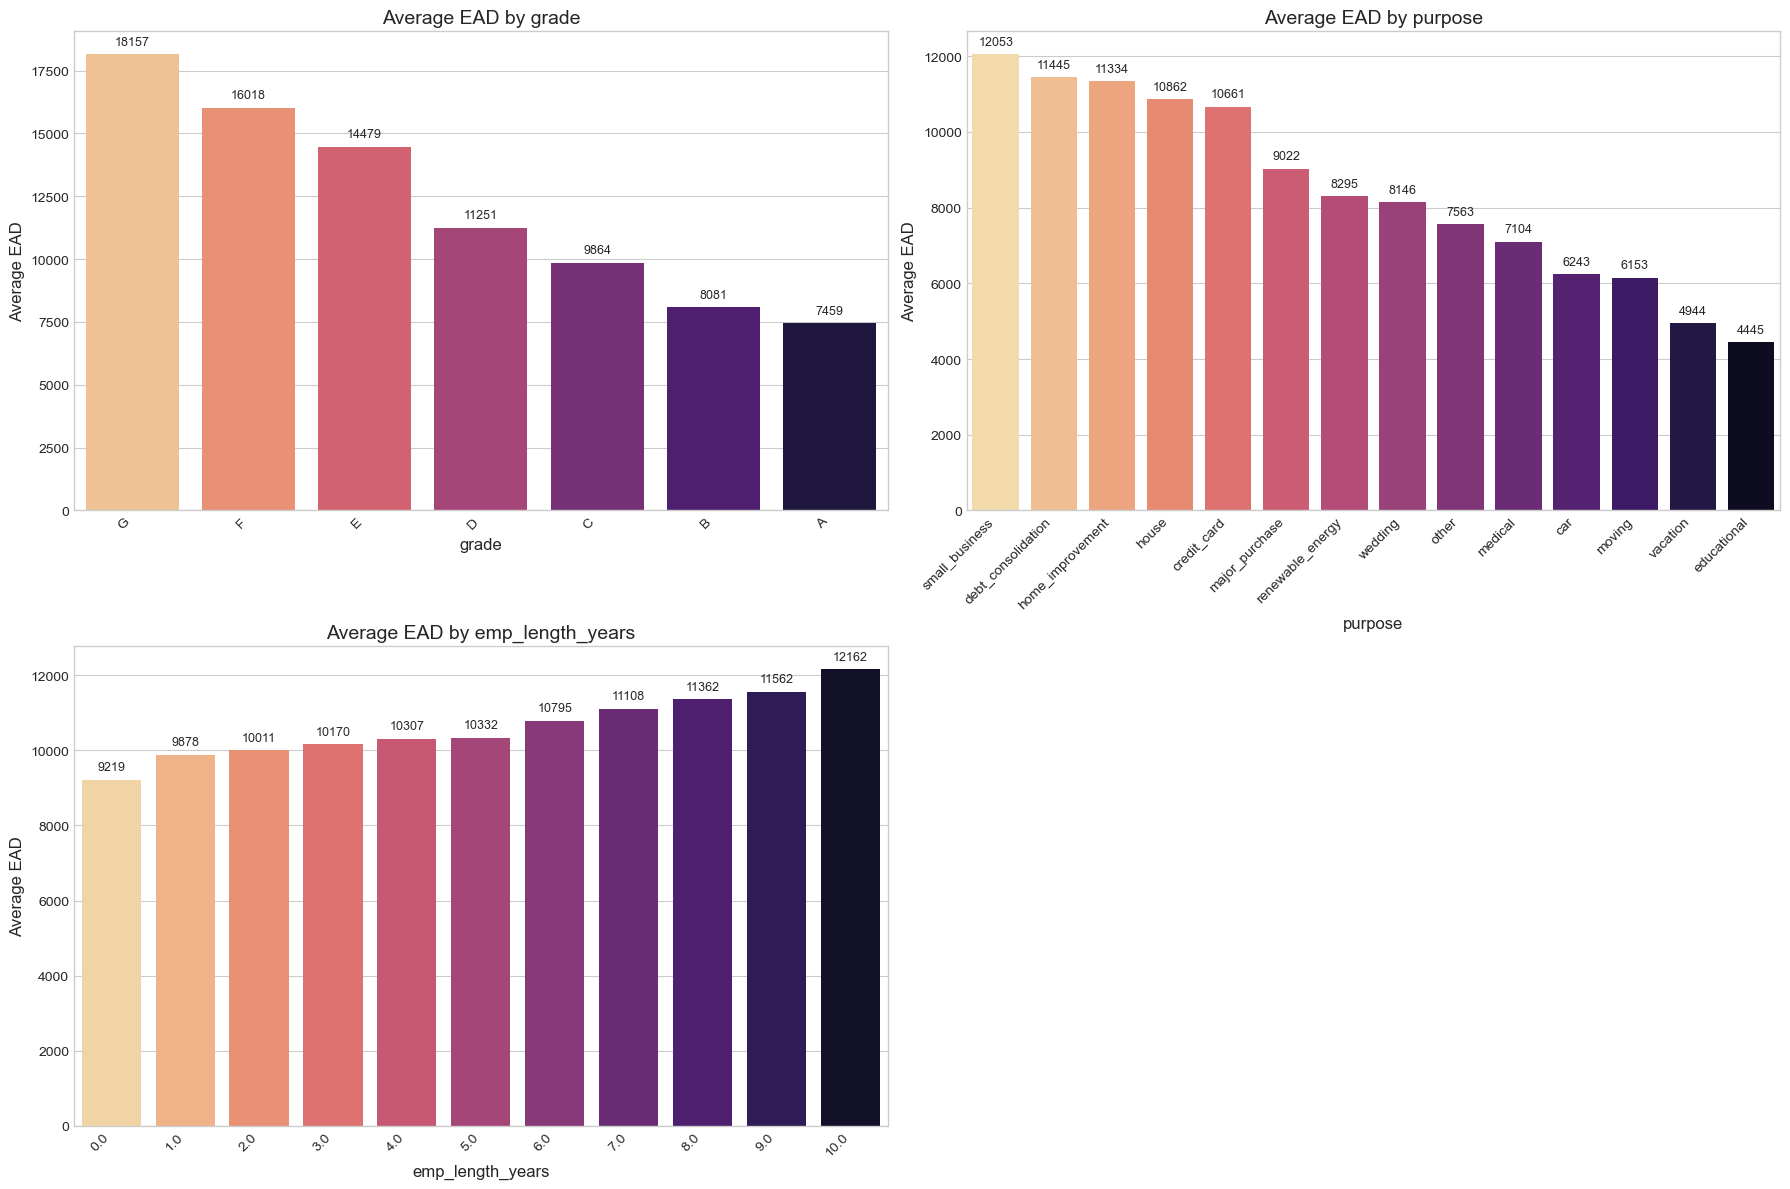


--- Exploratory Data Analysis Complete ---
All plots have been saved to the 'eda_plots' directory.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # ENHANCEMENT: Added for directory creation

# --- Configuration and Data Loading ---
# Assuming the preprocessed data is available in a CSV file.
# Replace 'path/to/your/loan_data_2007_2014_preprocessed.csv' with the actual path if different.
try:
    loan_data = pd.read_csv("samp.csv", low_memory=False)
except FileNotFoundError:
    print("Error: 'samp.csv' not found. Please ensure the file is in the correct directory or update the path.")
    exit()


# Make a copy to avoid SettingWithCopyWarning during transformations
df = loan_data.copy()

# --- Configuration for Saving Plots ---
# ENHANCEMENT: Configuration to save plots
SAVE_PLOTS = True  # Set to True to save plots, False to only display them
PLOTS_DIR = "eda_plots"
if SAVE_PLOTS and not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

# ENHANCEMENT: Apply a global style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')

# --- Preprocessing for EDA (if not already done in the loaded data) ---
# Convert 'term' to numerical for easier analysis if needed
if 'term' in df.columns:
    df['term_months'] = df['term'].str.strip().str.extract('(\d+)').astype(float)
else:
    print("Warning: 'term' column not found. Skipping 'term_months' creation.")

# Convert 'issue_d' to datetime for temporal analysis
# ENHANCEMENT: Uncommented and ensured 'issue_d' processing for temporal analysis
if 'issue_d' in df.columns:
    try:
        df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y', errors='coerce')
        df.dropna(subset=['issue_d'], inplace=True) # Remove rows where date conversion failed
        df['issue_year'] = df['issue_d'].dt.year
        df['issue_month_year'] = df['issue_d'].dt.to_period('M')
    except Exception as e:
        print(f"Error converting 'issue_d' to datetime: {e}. Skipping temporal analysis.")
        df['issue_year'] = np.nan # Ensure column exists even if empty
        df['issue_month_year'] = np.nan
else:
    print("Warning: 'issue_d' column not found. Skipping temporal analysis features.")
    df['issue_year'] = np.nan
    df['issue_month_year'] = np.nan


# Clean 'emp_length' for numerical analysis if needed, map to years
if 'emp_length' in df.columns:
    emp_length_map = {
        '10+ years': 10, '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
        '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9
    }
    df['emp_length_years'] = df['emp_length'].replace(emp_length_map).astype(float)
else:
    print("Warning: 'emp_length' column not found. Skipping 'emp_length_years' creation.")

# --- Define Target Variables ---
default_statuses = [
    'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)',
    'Does not meet the credit policy. Status: Charged Off'
]
if 'loan_status' in df.columns:
    df['is_default'] = df['loan_status'].apply(lambda x: 1 if x in default_statuses else 0)

    # LGD (Loss Given Default)
    if 'funded_amnt' in df.columns and 'recoveries' in df.columns:
        df['LGD'] = np.where(
            (df['is_default'] == 1) & (df['funded_amnt'] > 0),
            1 - (df['recoveries'] / df['funded_amnt']),
            np.nan
        )
        df['LGD'] = df['LGD'].clip(0, 1)
    else:
        print("Warning: 'funded_amnt' or 'recoveries' column not found. Skipping LGD calculation.")
        df['LGD'] = np.nan

    # EAD (Exposure at Default)
    if 'funded_amnt' in df.columns and 'total_rec_prncp' in df.columns:
        df['EAD'] = np.where(
            (df['is_default'] == 1),
            df['funded_amnt'] - df['total_rec_prncp'],
            np.nan
        )
        df['EAD'] = df['EAD'].clip(lower=0)
    else:
        print("Warning: 'funded_amnt' or 'total_rec_prncp' column not found. Skipping EAD calculation.")
        df['EAD'] = np.nan

    print("--- Target Variable Definitions Complete ---")
    print(f"Defaulted loans count: {df['is_default'].sum()}")
    print(f"Non-defaulted loans count: {(df.shape[0] - df['is_default'].sum())}")
    if 'LGD' in df.columns:
        print(f"LGD (first 5 defaulted loans):\n{df[df['is_default']==1]['LGD'].head()}")
    if 'EAD' in df.columns:
        print(f"EAD (first 5 defaulted loans):\n{df[df['is_default']==1]['EAD'].head()}")
else:
    print("Error: 'loan_status' column not found. Cannot define target variables PD, LGD, EAD.")
    # Set defaults to avoid errors later if these columns are expected
    df['is_default'] = 0
    df['LGD'] = np.nan
    df['EAD'] = np.nan


# --- 1. Class Imbalance Visualization (PD) ---
if 'is_default' in df.columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='is_default', data=df, palette='viridis')
    plt.title('Distribution of Loan Status (Default vs. Non-Default)', fontsize=15)
    plt.xlabel('Loan Status', fontsize=12)
    plt.ylabel('Number of Loans', fontsize=12)
    plt.xticks([0, 1], ['Non-Default (0)', 'Default (1)'], fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # ENHANCEMENT: Add percentages on bars
    total = len(df['is_default'])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height() + (total*0.005) # Adjust offset
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11)
        ax.annotate(f'{p.get_height()}', (x, y - (total*0.025) ), ha='center', va='bottom', fontsize=11, color='white')


    if SAVE_PLOTS:
        plt.savefig(os.path.join(PLOTS_DIR, "1_loan_status_distribution.png"), bbox_inches='tight')
    plt.show()

    default_percentage = df['is_default'].mean() * 100
    print(f"\nPercentage of Defaulted Loans: {default_percentage:.2f}%")
else:
    print("Skipping Class Imbalance Visualization as 'is_default' is not available.")


# --- 2. Correlation Matrix for Numerical Features ---
numerical_cols = [
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
    'dti', 'revol_util', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
    'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
    'emp_length_years', 'term_months', 'LGD', 'EAD'
]
# Filter out columns that might not exist
numerical_cols = [col for col in numerical_cols if col in df.columns]

if numerical_cols: # ENHANCEMENT: Check if list is not empty
    corr_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(16, 14)) # ENHANCEMENT: Slightly larger for better annotation readability
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8}) # ENHANCEMENT: smaller font for annot
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    if SAVE_PLOTS:
        plt.savefig(os.path.join(PLOTS_DIR, "2_correlation_matrix.png"), bbox_inches='tight')
    plt.show()

    print("\n--- Insights on Correlation & Multicollinearity ---")
    print("Observe the heatmap for strong correlations (values close to 1 or -1).")
    print("High positive/negative correlations between independent variables (e.g., loan_amnt and funded_amnt) indicate multicollinearity.")
    print("Multicollinearity can affect model interpretability and stability, especially for linear models.")
else:
    print("Skipping Correlation Matrix as no numerical columns were found/defined for it.")


# --- 3. Distribution Plots (Univariate Analysis) ---
features_for_distribution = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util']
# ENHANCEMENT: Filter for existing columns
features_for_distribution = [col for col in features_for_distribution if col in df.columns]

if features_for_distribution:
    plt.figure(figsize=(18, 12)) # ENHANCEMENT: Adjusted size
    for i, feature in enumerate(features_for_distribution):
        plt.subplot(2, 3, i + 1)
        plot_data = df[feature].dropna()
        sns.histplot(plot_data, kde=True, bins=30, color='skyblue', edgecolor='black')
        # ENHANCEMENT: Add mean and median lines
        plt.axvline(plot_data.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {plot_data.mean():.2f}')
        plt.axvline(plot_data.median(), color='g', linestyle='-', linewidth=2, label=f'Median: {plot_data.median():.2f}')
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend(fontsize=10)
        print(f"Skewness of {feature}: {plot_data.skew():.2f}")
    plt.tight_layout()
    if SAVE_PLOTS:
        plt.savefig(os.path.join(PLOTS_DIR, "3_numerical_feature_distributions.png"), bbox_inches='tight')
    plt.show()
else:
    print("Skipping Distribution Plots as no features for distribution were found/defined.")


# --- 4. Default Rates by Category (Bivariate Analysis) ---
categorical_features_for_default_rate = ['grade', 'term', 'home_ownership', 'purpose', 'verification_status', 'emp_length']
# ENHANCEMENT: Filter for existing columns
categorical_features_for_default_rate = [col for col in categorical_features_for_default_rate if col in df.columns and 'is_default' in df.columns]

if categorical_features_for_default_rate:
    plt.figure(figsize=(20, 18)) # ENHANCEMENT: Adjusted size
    for i, feature in enumerate(categorical_features_for_default_rate):
        plt.subplot(3, 2, i + 1)
        # Calculate default rate for each category
        default_rates = df.groupby(feature)['is_default'].mean().sort_values(ascending=False) * 100 # As percentage
        
        # ENHANCEMENT: Limit number of categories displayed if too many, e.g., for 'purpose'
        if default_rates.nunique() > 15: # Arbitrary limit
            default_rates = default_rates.head(15)
            plot_title = f'Top 15 Default Rates by {feature}'
        else:
            plot_title = f'Default Rate by {feature}'

        ax = sns.barplot(x=default_rates.index, y=default_rates.values, palette='coolwarm_r') # ENHANCEMENT: Reversed palette for higher = warmer
        plt.title(plot_title, fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Default Rate (%)', fontsize=12) # ENHANCEMENT: Clarified label
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=10)

        # ENHANCEMENT: Add percentage annotations on bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points', fontsize=9)
    plt.tight_layout()
    if SAVE_PLOTS:
        plt.savefig(os.path.join(PLOTS_DIR, "4_default_rates_by_category.png"), bbox_inches='tight')
    plt.show()
else:
    print("Skipping Default Rates by Category as relevant categorical features or 'is_default' are not available.")


# --- 5. Temporal Trends in Default Rates ---
# ENHANCEMENT: Implemented temporal trend analysis
if 'issue_year' in df.columns and not df['issue_year'].isnull().all() and 'is_default' in df.columns:
    plt.figure(figsize=(12, 7))
    
    # Default rate by year
    yearly_default_rate = df.groupby('issue_year')['is_default'].mean() * 100
    if not yearly_default_rate.empty:
        sns.lineplot(x=yearly_default_rate.index, y=yearly_default_rate.values, marker='o', color='crimson')
        plt.title('Trend of Loan Default Rate by Issue Year', fontsize=15)
        plt.xlabel('Issue Year', fontsize=12)
        plt.ylabel('Default Rate (%)', fontsize=12)
        plt.xticks(yearly_default_rate.index.astype(int), rotation=45, fontsize=10) # Ensure years are ints for ticks
        plt.yticks(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)

        if SAVE_PLOTS:
            plt.savefig(os.path.join(PLOTS_DIR, "5_temporal_default_rate_trend.png"), bbox_inches='tight')
        plt.show()
    else:
        print("No data available for yearly default rate trend.")

    # Optional: Default rate by month-year (can be noisy if data span is short)
    if 'issue_month_year' in df.columns and not df['issue_month_year'].isnull().all():
        monthly_default_rate = df.groupby('issue_month_year')['is_default'].mean() * 100
        if not monthly_default_rate.empty and len(monthly_default_rate) > 1: # Plot if there's more than one period
            plt.figure(figsize=(15, 7))
            monthly_default_rate.index = monthly_default_rate.index.to_timestamp() # Convert PeriodIndex to DatetimeIndex for plotting
            sns.lineplot(x=monthly_default_rate.index, y=monthly_default_rate.values, marker='.', color='dodgerblue')
            plt.title('Trend of Loan Default Rate by Issue Month-Year', fontsize=15)
            plt.xlabel('Issue Month-Year', fontsize=12)
            plt.ylabel('Default Rate (%)', fontsize=12)
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.yticks(fontsize=10)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            if SAVE_PLOTS:
                plt.savefig(os.path.join(PLOTS_DIR, "5b_temporal_monthly_default_rate_trend.png"), bbox_inches='tight')
            plt.show()
        elif not monthly_default_rate.empty:
             print("Not enough monthly periods to plot a meaningful monthly trend.")
        else:
            print("No data available for monthly default rate trend.")
else:
    print("Skipping Temporal Trends analysis as 'issue_year' or 'is_default' data is not available or processed.")


# --- 6. Target Variable Analysis by Categories (LGD & EAD for defaulted loans) ---
if 'is_default' in df.columns and 'LGD' in df.columns and 'EAD' in df.columns:
    defaulted_df = df[df['is_default'] == 1].copy()

    if not defaulted_df.empty:
        print("\n--- Analysis of LGD and EAD for Defaulted Loans ---")

        # LGD by categorical features
        lgd_categorical_features = ['grade', 'purpose', 'emp_length_years']
        lgd_categorical_features = [col for col in lgd_categorical_features if col in defaulted_df.columns]

        if lgd_categorical_features:
            num_lgd_features = len(lgd_categorical_features)
            plt.figure(figsize=(18, 6 * ((num_lgd_features + 1) // 2))) # Adjust height based on number of plots
            for i, feature in enumerate(lgd_categorical_features):
                plt.subplot((num_lgd_features + 1) // 2, 2, i + 1) # Dynamic subplot grid
                avg_lgd = defaulted_df.groupby(feature)['LGD'].mean().sort_values(ascending=False)
                
                # ENHANCEMENT: Limit categories if too many
                if avg_lgd.nunique() > 15:
                    avg_lgd = avg_lgd.head(15)
                    plot_title = f'Top 15 Average LGD by {feature}'
                else:
                    plot_title = f'Average LGD by {feature}'

                ax = sns.barplot(x=avg_lgd.index, y=avg_lgd.values, palette='plasma_r') # ENHANCEMENT: _r for reversed higher LGD = warmer
                plt.title(plot_title, fontsize=14)
                plt.xlabel(feature, fontsize=12)
                plt.ylabel('Average LGD', fontsize=12)
                plt.xticks(rotation=45, ha='right', fontsize=10)
                plt.yticks(fontsize=10)
                # ENHANCEMENT: Add value annotations on bars
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=9)
            plt.tight_layout()
            if SAVE_PLOTS:
                plt.savefig(os.path.join(PLOTS_DIR, "6a_avg_lgd_by_category.png"), bbox_inches='tight')
            plt.show()
        else:
            print("No categorical features found in defaulted_df for LGD analysis.")


        # EAD by categorical features
        ead_categorical_features = ['grade', 'purpose', 'emp_length_years']
        ead_categorical_features = [col for col in ead_categorical_features if col in defaulted_df.columns]

        if ead_categorical_features:
            num_ead_features = len(ead_categorical_features)
            plt.figure(figsize=(18, 6 * ((num_ead_features + 1) // 2))) # Adjust height
            for i, feature in enumerate(ead_categorical_features):
                plt.subplot((num_ead_features + 1) // 2, 2, i + 1)
                avg_ead = defaulted_df.groupby(feature)['EAD'].mean().sort_values(ascending=False)

                if avg_ead.nunique() > 15:
                    avg_ead = avg_ead.head(15)
                    plot_title = f'Top 15 Average EAD by {feature}'
                else:
                    plot_title = f'Average EAD by {feature}'

                ax = sns.barplot(x=avg_ead.index, y=avg_ead.values, palette='magma_r') # ENHANCEMENT: _r for reversed higher EAD = warmer
                plt.title(plot_title, fontsize=14)
                plt.xlabel(feature, fontsize=12)
                plt.ylabel('Average EAD', fontsize=12)
                plt.xticks(rotation=45, ha='right', fontsize=10)
                plt.yticks(fontsize=10)
                # ENHANCEMENT: Add value annotations on bars
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), # .0f for EAD, likely larger values
                                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=9)
            plt.tight_layout()
            if SAVE_PLOTS:
                plt.savefig(os.path.join(PLOTS_DIR, "6b_avg_ead_by_category.png"), bbox_inches='tight')
            plt.show()
        else:
            print("No categorical features found in defaulted_df for EAD analysis.")
    else:
        print("\nNo defaulted loans found in the dataset to perform LGD and EAD analysis.")
else:
    print("Skipping LGD and EAD analysis as 'is_default', 'LGD', or 'EAD' columns are not available.")

print("\n--- Exploratory Data Analysis Complete ---")
if SAVE_PLOTS:
    print(f"All plots have been saved to the '{PLOTS_DIR}' directory.")